# Dynamical Decoupling (DD) Simulation
## Specific case: m=2 and t1=t2=t
Ideal system:  **$e^{-iZt}$** \
Noisy system: **$e^{-i(Z+\lambda{X})t}$**
#### Want to prove: 
**$e^{-i(Z+\lambda{X})t}Ze^{-i(Z+\lambda{X})t}Z \approx e^{-2iZt}$** 

### Libraries and Pauli Matrices 

In [3]:
import numpy as np
import scipy
import math
from scipy.linalg import expm, svd
import matplotlib.pyplot as plt
import scipy.optimize as spo

In [4]:
X, Z, I = np.matrix([[0, 1],[1, 0]]), np.matrix([[1, 0],[0, -1]]), np.matrix([[1, 0],[0, 1]])

### Simulation code

In [6]:
# creating the variables
time = []
epsilon = []

# set the value of lambda
lambda_value = 0.1

# simulating the equation for every 0.01s for 1s.
for t in np.linspace(0.0,1.0,num=101):
    A = expm(-1j*(Z+lambda_value*X)*t)*Z*expm(-1j*(Z+lambda_value*X)*t)*Z
    B = expm(-2j*Z*t)
    # calculate the difference between the ideal and noisy system
    difference = A - B
    # get the maximum eigen value of the difference matrix
    eigenvalues,_ = svd(difference, compute_uv = False)
    max_eigenvalue = np.max(eigenvalues)
    # add the maximum eigen value to the array epsilon
    epsilon.append(max_eigenvalue)
    time.append(t) 
    
print("error at t1 = t2 = " + str(time[5]) + " is " + str(epsilon[5]))

error at t1 = t2 = 0.05 is 0.0004995820845829024


### Graph t vs $\epsilon$

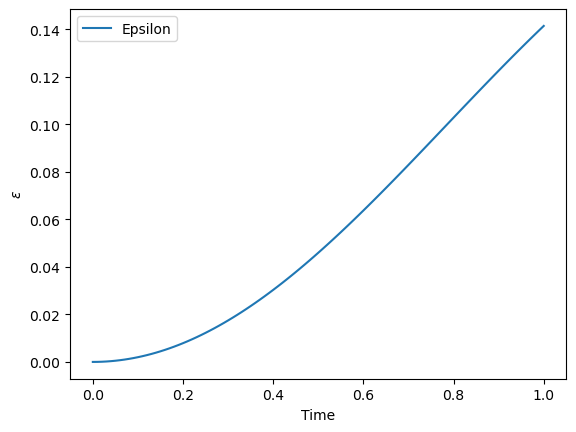

In [8]:
# graph the changes in epsilon respect to the time
plt.plot(time, epsilon, label = "Epsilon")

plt.xlabel('Time')
plt.ylabel('$\epsilon$')
plt.legend()

plt.savefig('first_simulation.png')
plt.show()


## General case
The generalization of the previous case is the following:\
Ideal system: **$e^{-iZs_1T}e^{-iZs_2T}e^{-iZs_3T}...e^{-iZs_mT}$** \
Noisy system: **$e^{-i(Z+\lambda{X})s_1T}e^{-i(Z+\lambda{X})s_2T}e^{-i(Z+\lambda{X})s_3T}...e^{-i(Z+\lambda{X})s_mT}$**
##### Error function:
**$\epsilon=||(e^{-i(Z+\lambda{X})s_1T}Ze^{-i(Z+\lambda{X})s_2T}Ze^{-i(Z+\lambda{X})s_3T}Ze^{-i(Z+\lambda{X})s_4T}Z...Ze^{-i(Z+\lambda{X})s_mT}Z) - e^{-iZT}||$**
### Simulation


In [10]:
def error_calculation(lambda_value, m, T, areEqual, s_values):
    prev_A = I
    
    # Case 1: Periodic DD when s1 = s2 = ... = sm 
    if (areEqual == True):
        for i in np.linspace(1,m,num=m):
            # even numbers
            if (i%2 == 0): 
                A = np.dot(prev_A, expm(-1j*(Z-lambda_value*X)*T/m)) 
                #prev_A * expm(-1j*(Z-lambda_value*X)*T/m)
            # odd numbers
            else:
                A = np.dot(prev_A, expm(-1j*(Z+lambda_value*X)*T/m))
                #prev_A * expm(-1j*(Z+lambda_value*X)*T/m)
            # updating the matrix A
            prev_A = A
    
    # Case 2: Concatenated DD or Uhrig DD when s has a different values       
    else:
        i = 1
        # simulating the equation 
        for s in s_values:
            # even numbers
            if (i%2 == 0):
                A = np.dot(prev_A, expm(-1j*(Z-lambda_value*X)*s*T))
                # prev_A * expm(-1j*(Z-lambda_value*X)*s*T)   
            # odd numbers
            else:
                A = np.dot(prev_A, expm(-1j*(Z+lambda_value*X)*s*T))
                # prev_A * expm(-1j*(Z+lambda_value*X)*s*T)
            # updating variables
            #print(A)
            prev_A = A 
            i+=1 
            
    B = expm(-1j*Z*T) 
    # calculate the difference between the ideal and noisy system
    difference = A - B
    # get the maximum eigen value of the difference matrix
    eigenvalues = svd(difference, compute_uv = False)
    max_eigenvalue = np.max(eigenvalues)
    #print("The error is ", max_eigenvalue)
    return max_eigenvalue

def UDD_calculate_s_values(m):
    s_values = []
    prev_t = 0
    for j in range(1, m+1):
        t = np.power(np.sin(j*np.pi/(2*m)), 2)
        s_values.append(t-prev_t)
        prev_t = t
    return s_values        


In [11]:
# creating the variables
m_value_c1 = []
m_value_c2 = [2,3,6,11]
m_value_c3 = [2,3,4,6,8,10]
error_c1 = []
error_c2 = []
error_c3 = []

# set the value of lambda and T
lambda_value = 0.1
T = 0.1

print("Case 1 (PDD) Even ##########################")
for m in range(2,11,2):
    error_c1.append(error_calculation(lambda_value, m, T, True, []))
    m_value_c1.append(m)
    print("For m = " + str(m) + " the error is " + str(error_calculation(lambda_value, m, T, True, [])))

print("\nCase 2 (CDD) ##########################")
error_c2.append(error_calculation(lambda_value, 2, T, False, [1/2,1/2]))
print("For m = 2 the error is " + str(error_c2[0]))

error_c2.append(error_calculation(lambda_value, 3, T, False, [1/4,1/2,1/4]))
print("For m = 3 the error is " + str(error_c2[1]))

error_c2.append(error_calculation(lambda_value, 6, T, False, [1/8,1/4,1/8,1/8,1/4,1/8]))
print("For m = 6 the error is " + str(error_c2[2]))

error_c2.append(error_calculation(lambda_value, 11, T, False, [1/16,1/8,1/16,1/16,1/8,1/8,1/8,1/16,1/16,1/8,1/16]))
print("For m = 11 the error is " + str(error_c2[3]))


print("\nCase 3 (UDD) ##########################")
error_c3.append(error_calculation(lambda_value, 2, T, False, UDD_calculate_s_values(2)))
print("For m = 2 the error is " + str(error_c3[0]))

error_c3.append(error_calculation(lambda_value, 3, T, False, UDD_calculate_s_values(3)))
print("For m = 3 the error is " + str(error_c3[1]))

error_c3.append(error_calculation(lambda_value, 4, T, False, UDD_calculate_s_values(4)))
print("For m = 4 the error is " + str(error_c3[2]))

error_c3.append(error_calculation(lambda_value, 6, T, False, UDD_calculate_s_values(6)))
print("For m = 6 the error is " + str(error_c3[3]))
print(UDD_calculate_s_values(6))

error_c3.append(error_calculation(lambda_value, 6, T, False, UDD_calculate_s_values(8)))
print("For m = 8 the error is " + str(error_c3[4]))
print(UDD_calculate_s_values(8))


error_c3.append(error_calculation(lambda_value, 10, T, False, UDD_calculate_s_values(10)))
print("For m = 10 the error is " + str(error_c3[5]))
print(UDD_calculate_s_values(10))


Case 1 (PDD) Even ##########################
For m = 2 the error is 0.0004995820845829024
For m = 4 the error is 0.0002496353782160249
For m = 6 the error is 0.00016640438462257455
For m = 8 the error is 0.0001247982491792856
For m = 10 the error is 9.983673349871192e-05

Case 2 (CDD) ##########################
For m = 2 the error is 0.0004995820845829024
For m = 3 the error is 1.249909813324557e-05
For m = 6 the error is 1.8775597696427797e-07
For m = 11 the error is 2.606462738292785e-08

Case 3 (UDD) ##########################
For m = 2 the error is 0.0004995820845829024
For m = 3 the error is 1.2499098133243837e-05
For m = 4 the error is 2.9031863259118986e-07
For m = 6 the error is 8.175186760529897e-08
[0.06698729810778066, 0.1830127018922193, 0.24999999999999994, 0.25, 0.18301270189221952, 0.06698729810778059]
For m = 8 the error is 4.455600939580585e-08
[0.03806023374435662, 0.10838637566236962, 0.16221167441072884, 0.1913417161825448, 0.19134171618254503, 0.1622116744107288, 0

In [12]:
# values found below

m_values_optimized = [2,3,4,6,8,10]  
error_optimized = [0.0004995710092228119,4.571626303785287e-10,1.3185843644749708e-09,6.570497960815582e-10,1.303151245245274e-09,6.195767679163424e-10]

### Graph t vs $\epsilon$

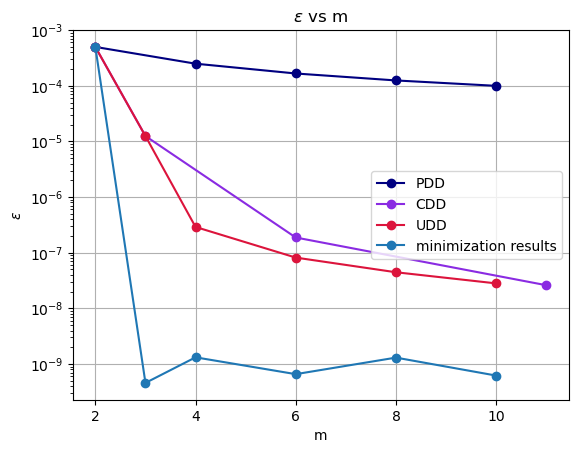

In [14]:
# graph the changes of the error for different values of m

plt.plot(m_value_c1, error_c1, color='navy', marker='o', label = "PDD")
plt.plot(m_value_c2, error_c2, color='blueviolet', marker='o', label = "CDD")
plt.plot(m_value_c3, error_c3, color='crimson', marker='o', label = "UDD")
plt.plot(m_values_optimized, error_optimized, marker='o', label = "minimization results")


plt.title('$\epsilon$ vs m')
plt.xlabel('m')
plt.ylabel('$\epsilon$')
plt.yscale("log")

plt.legend()
plt.grid()

plt.savefig('general_simulation.png')
plt.show()


## Minimize the $\epsilon$ function for a fixed T and m

### When m = 2

Fix T, $\lambda\$ and m = 2

In [18]:
# Defining the funtion epsilon
def epsilon_func(s_values):
    s1 = s_values[0]
    s2 = s_values[1]
    lambda_value = 0.1
    T = 0.1
    A = expm(-1j*(Z+lambda_value*X)*s1*T) @ expm(-1j*(Z-lambda_value*X)*s2*T)
    difference = A - expm(-1j*Z*T)
    eigenvalues = svd(difference, compute_uv = False)
    epsilon = np.max(eigenvalues)
    return epsilon    

In [19]:
# Starting guess
s_values_start = [np.random.random(), np.random.random()]

# Constraints -> s1 + s2 = 1 
const = ({'type':'eq',
          'fun' : lambda s_values : (s_values[0] + s_values[1] - 1)})
# Bounds
bounds = ((0.0,1.0),(0.0,1.0))

# optimizing
result =  spo.minimize(epsilon_func, s_values_start, method='L-BFGS-B', options={'disp':True}, constraints = const, bounds = bounds)

# print result
s_values = result.x
s1 = s_values[0]
s2 = s_values[1]
print("s1 = " + str(s1) + " s2 = " + str(s2))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.47548D-02    |proj g|=  8.89622D-02

At iterate    1    f=  9.13173D-03    |proj g|=  5.66884D-02

At iterate    2    f=  8.12106D-03    |proj g|=  2.97699D-02

At iterate    3    f=  7.88544D-03    |proj g|=  1.05894D-02

At iterate    4    f=  7.77074D-03    |proj g|=  1.45123D-02

At iterate    5    f=  6.32323D-03    |proj g|=  5.70231D-02

At iterate    6    f=  4.73720D-03    |proj g|=  8.53845D-02

At iterate    7    f=  3.94101D-03    |proj g|=  4.53967D-02

At iterate    8    f=  8.09283D-04    |proj g|=  7.90200D-02

At iterate    9    f=  6.32444D-04    |proj g|=  1.01627D-02

At iterate   10    f=  5.28803D-04    |proj g|=  2.69720D-02
s1 = 0.4999836368662254 s2 = 0.49998350136824116

At iterate   11    f=  5.12538D-04    |proj g|=  1.63890D-02

At iterate   12    f=  4.99579D-04    |

/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minimize.py:576: RuntimeWarning: Method L-BFGS-B cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


In [20]:
# lowest value found above - lowest so Far
epsilon_func([0.5, 0.5])

0.0004995820845829024

In [21]:
# minimized value
print(s1,s2)
print(s1+s2)
epsilon_func([s1,s2])


0.4999836368662254 0.49998350136824116
0.9999671382344666


0.0004995710108497638

In [22]:
print(epsilon_func([0.49998361065319974, 0.49998361065319974]))
print(epsilon_func([0.4999837890188431, 0.4999833220272216]))
print(epsilon_func([0.49998336258508624,0.49998337866864523]))
print(epsilon_func([0.4999833648036424,0.499983365617878]))


0.0004995710115871328
0.0004995710106577283
0.0004995710092230183
0.0004995710092228119


### When m = 3
Fix T, $\lambda\$ and m = 3

In [24]:
# Defining the funtion epsilon
def epsilon_func(s_values):
    s1 = s_values[0]
    s2 = s_values[1]
    s3 = s_values[2]
    lambda_value = 0.1
    T = 0.1
    A = expm(-1j*(Z+lambda_value*X)*s1*T) @ expm(-1j*(Z-lambda_value*X)*s2*T)
    B = A @ expm(-1j*(Z+lambda_value*X)*s3*T)
    difference = B - expm(-1j*Z*T)
    eigenvalues = svd(difference, compute_uv = False)
    epsilon = np.max(eigenvalues)
    return epsilon   

In [25]:
# Starting guess
s_values_start = [np.random.random(),np.random.random(), np.random.random()]

# Constraints -> s1 + s2 + s3 = 1 
const = ({'type':'eq',
          'fun' : lambda s_values : (s_values[0] + s_values[1] + s_values[2] - 1)})
# Bounds
bounds = ((0.0,1.0),(0.0,1.0),(0.0,1.0))

# optimizing
result =  spo.minimize(epsilon_func, s_values_start, method='L-BFGS-B', options={'disp':True}, constraints = const, bounds = bounds)

# print result
s_values = result.x
s1 = s_values[0]
s2 = s_values[1]
s3 = s_values[2]
print("s1 = ", s1, " s2 = ", s2, " s3 = ", s3)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.19327D-02    |proj g|=  1.00454D-01

At iterate    1    f=  1.44520D-02    |proj g|=  9.54794D-02

At iterate    2    f=  7.63704D-03    |proj g|=  8.34886D-02

At iterate    3    f=  4.65651D-03    |proj g|=  1.81620D-02

At iterate    4    f=  4.57029D-03    |proj g|=  2.41785D-02

At iterate    5    f=  4.19908D-03    |proj g|=  1.14166D-02

At iterate    6    f=  2.74728D-03    |proj g|=  8.70156D-02

At iterate    7    f=  1.29653D-03    |proj g|=  9.80761D-02

At iterate    8    f=  4.66871D-04    |proj g|=  7.35873D-02

At iterate    9    f=  3.03353D-04    |proj g|=  3.33480D-02

At iterate   10    f=  2.35335D-04    |proj g|=  3.05487D-02

At iterate   11    f=  2.32694D-04    |proj g|=  2.95778D-02

At iterate   12    f=  2.23737D-04    |proj g|=  2.35191D-03

At iterate   13    f=  2.2


 Nonpositive definiteness in Cholesky factorization in formk;
   refresh the lbfgs memory and restart the iteration.


In [26]:
# lowest value found above
epsilon_func([1/4,1/2,1/4])

1.249909813324557e-05

In [27]:
# minimized value
print(s1+s2+s3)
print("s1= ", s1, "s2 = ", s2, "s3=", s3)
epsilon_func([s1,s2,s3])


1.0000041273325742
s1=  0.25031248254681976 s2 =  0.49937645064328906 s3= 0.2503151941424652


6.263998055875849e-09

In [28]:
# lowest found
print(s1,s2,s3)
print(epsilon_func([0.2503131326075795, 0.4993768041187886, 0.25031423701763944]))
#s1 =  0.25031269456576893  s2 =  0.49937461113734705  s3 =  0.2503126942968841
#4.16299704372454e-07
print(epsilon_func([0.25031269456576893,0.49937461113734705,0.2503126942968841]))
print(epsilon_func([0.2503139951814718,0.49937672578019454,0.2503134407280822]))
print(epsilon_func([0.250313782188061,0.4993766735025422,0.2503137106126561]))

s1 =  0.2503130334449466  
s2 =  0.49937393184986445  
s3 =  0.250313034705189
print(s1+s2+s3)
epsilon_func([s1,s2,s3])

0.25031248254681976 0.49937645064328906 0.2503151941424652
2.7011641425558947e-09
4.16299704372454e-07
9.637770643047125e-10
4.571626303785287e-10
1.0


4.165208333609877e-07

### When m = 4
Fix T, $\lambda\$ and m = 4

In [30]:
# Defining the funtion epsilon
def epsilon_func(s_values):
    s1 = s_values[0]
    s2 = s_values[1]
    s3 = s_values[2]
    s4 = s_values[3]
    lambda_value = 0.1
    T = 0.1
    A = expm(-1j*(Z+lambda_value*X)*s1*T)@ expm(-1j*(Z-lambda_value*X)*s2*T) @ expm(-1j*(Z+lambda_value*X)*s3*T)@ expm(-1j*(Z-lambda_value*X)*s4*T)
    difference = A - expm(-1j*Z*T)
    eigenvalues = svd(difference, compute_uv = False)
    epsilon = np.max(eigenvalues)
    return epsilon   

In [31]:
# Starting guess
#s_values_start = [0,0,0,0]
s_values_start = [np.random.random(), np.random.random(), np.random.random(), np.random.random()]

# Constraints -> s1 + s2 + s3 + s4 = 1 
const = ({'type':'eq',
          'fun' : lambda s_values : (s_values[0] + s_values[1] + s_values[2] + s_values[3]- 1)})
# Bounds
bounds = ((0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0, 1.0))

# optimizing
result =  spo.minimize(epsilon_func, s_values_start, method='L-BFGS-B', options={'disp':True,'ftol': 1e-10}, constraints = const, bounds = bounds)

# print result
s_values = result.x
s1 = s_values[0]
s2 = s_values[1]
s3 = s_values[2]
s4 = s_values[3]
print("s1 = ", s1, " s2 = ", s2, " s3 = ", s3, " s4 = ", s4)


 Nonpositive definiteness in Cholesky factorization in formk;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.50574D-02    |proj g|=  1.00432D-01

At iterate    1    f=  3.08090D-02    |proj g|=  1.00287D-01

At iterate    2    f=  4.06931D-03    |proj g|=  4.15649D-02

At iterate    3    f=  3.77316D-03    |proj g|=  1.44256D-02

At iterate    4    f=  2.94260D-03    |proj g|=  5.51612D-02

At iterate    5    f=  1.74596D-03    |proj g|=  9.64784D-02

At iterate    6    f=  4.95738D-04    |proj g|=  2.79111D-02

At iterate    7    f=  4.23806D-04    |proj g|=  3.14543D-02

At iterate    8    f=  4.03176D-04    |proj g|=  2.76298D-03

At iterate    9    f=  4.02998D-04    |proj g|=  6.50521D-04

At iterate   10    f=  4.02987D-04    |proj g|=  5.37269D-04

At iterate   11    f=  4.02937D-04    |proj g|=  4.79368D-04

At iterate   12    f=  4.02443D-04    |proj g|=  1.75647D-03

At iterate   13    f=  4.0

In [32]:
# lowest s in prev part
epsilon_func([0.14644660940672624, 0.3535533905932736, 0.35355339059327384, 0.14644660940672627])

2.9031863259118986e-07

In [33]:
# minimized values
print(s1+s2+s3+s4)
print(s1, s2, s3, s4)
epsilon_func([s1,s2,s3,s4])


1.0000020515309196
0.16006624314636198 0.36749355457507377 0.3400038084277212 0.13243844538176264


6.938793025667748e-10

In [34]:
print(epsilon_func([0.14002269377036433,0.3471307048304575,0.35994513617231017,0.1529014652268681] ))
print(epsilon_func([0.14852368879439615,0.35548431730913477,0.3514863478995621,0.144505645996907]))
print(epsilon_func([0.18260355134222295,0.3934429524912896,0.31758791595654123,0.10636778240906868]))
print(epsilon_func([0.11201090406009984,0.3221869714667899,0.3878254228854342,0.17797886271369787]))
print(epsilon_func([0.15660249719595007,0.36380421129713986,0.3434496115008143,0.13614572318190296]))
print(epsilon_func([0.16772630320693488,0.37592124270119004,0.3323840437689914,0.12397048978012597]))
print(epsilon_func([0.16006624314636198,0.36749355457507377,0.3400038084277212,0.13243844538176264]))
#lowest found

#s1 =  0.14002269377036433
#s2 =  0.3471307048304575  
#s3 =  0.35994513617231017  
#s4 =  0.1529014652268681
# 2.0282149550342433e-07

#s1 =  0.14852368879439615  
#s2 =  0.35548431730913477  
#s3 =  0.3514863478995621  
#s4 =  0.144505645996907
# 2.022947457958505e-07

s1 =  0.03765566095204766  
s2 =  0.27063906421385175  
s3 =  0.4618681202205331  
s4 =  0.22984044745027865
print(s1+s2+s3+s4)
epsilon_func([s1,s2,s3,s4])

2.028214955034198e-07
2.0229474578497696e-07
3.5239377130349133e-09
1.8201361302785667e-09
1.5676595736022162e-09
1.3185843644749708e-09
1.000003292836711


9.336118110792099e-08

### When m = 6
Fix T, $\lambda\$ and m = 6

In [36]:
# Defining the funtion epsilon
def epsilon_func(s_values):
    s1 = s_values[0]
    s2 = s_values[1]
    s3 = s_values[2]
    s4 = s_values[3]
    s5 = s_values[4]
    s6 = s_values[5]
    lambda_value = 0.1
    T = 0.1
    A = expm(-1j*(Z+lambda_value*X)*s1*T) @ expm(-1j*(Z-lambda_value*X)*s2*T) @ expm(-1j*(Z+lambda_value*X)*s3*T) @ expm(-1j*(Z-lambda_value*X)*s4*T) @ expm(-1j*(Z+lambda_value*X)*s5*T) @ expm(-1j*(Z-lambda_value*X)*s6*T)
    
    difference = A - expm(-1j*Z*T)
    eigenvalues = svd(difference, compute_uv = False)
    epsilon = np.max(eigenvalues)
    return epsilon   

In [37]:
# Starting guess
s_values_start = [np.random.random(), np.random.random(), np.random.random(), np.random.random(), np.random.random(), np.random.random()]

# Constraints -> s1 + s2 + s3 + s4 + s5 + s6 = 1 
const = ({'type':'eq',
          'fun' : lambda s_values : (s_values[0] + s_values[1] + s_values[2] + s_values[3] + s_values[4] + s_values[5] - 1)})
# Bounds
bounds = ((0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0, 1.0),(0.0,1.0),(0.0, 1.0))

# optimizing
result =  spo.minimize(epsilon_func, s_values_start, method='L-BFGS-B', options={'disp':True, 'ftol': 1e-10}, constraints = const, bounds = bounds)

# print result
s_values = result.x
s1 = s_values[0]
s2 = s_values[1]
s3 = s_values[2]
s4 = s_values[3]
s5 = s_values[4]
s6 = s_values[5]
print("s1 = ", s1, " s2 = ", s2, " s3 = ", s3, " s4 = ", s4," s5 = ", s5, " s6 = ", s6)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.39171D-01    |proj g|=  9.93721D-02

At iterate    1    f=  1.81480D-01    |proj g|=  9.97126D-02
  ys=-1.741E-04  -gs= 5.760E-02 BFGS update SKIPPED

At iterate    2    f=  2.04585D-02    |proj g|=  9.88474D-02

At iterate    3    f=  5.48428D-03    |proj g|=  6.30327D-02

At iterate    4    f=  4.69098D-03    |proj g|=  3.56732D-02

At iterate    5    f=  4.49983D-03    |proj g|=  1.13212D-02

At iterate    6    f=  4.32396D-03    |proj g|=  1.53910D-02

At iterate    7    f=  4.13351D-03    |proj g|=  1.01357D-02

At iterate    8    f=  3.43549D-03    |proj g|=  1.00482D-01

At iterate    9    f=  2.13193D-03    |proj g|=  7.64595D-02

At iterate   10    f=  1.38296D-03    |proj g|=  5.68801D-02

At iterate   11    f=  8.76696D-04    |proj g|=  3.95132D-02

At iterate   12    f=  3.83267D-04  


 Nonpositive definiteness in Cholesky factorization in formk;
   refresh the lbfgs memory and restart the iteration.


At iterate   20    f=  1.86714D-06    |proj g|=  3.29147D-02

At iterate   21    f=  1.36872D-06    |proj g|=  2.01395D-02

At iterate   22    f=  1.30068D-06    |proj g|=  1.81485D-03

At iterate   23    f=  1.30040D-06    |proj g|=  1.28788D-03

At iterate   24    f=  1.29983D-06    |proj g|=  2.31157D-03

At iterate   25    f=  1.29718D-06    |proj g|=  5.35771D-03

At iterate   26    f=  1.29142D-06    |proj g|=  9.42226D-03

At iterate   27    f=  1.27541D-06    |proj g|=  1.65333D-02

At iterate   28    f=  1.23590D-06    |proj g|=  2.76594D-02

At iterate   29    f=  1.13944D-06    |proj g|=  4.55801D-02

At iterate   30    f=  9.36003D-07    |proj g|=  7.18001D-02

At iterate   31    f=  6.22134D-07    |proj g|=  9.13234D-02

At iterate   32    f=  3.26319D-07    |proj g|=  1.75433D-02

At iterate   33    f=  1.29463D-07    |proj g|=  6.89371D-02

At iterate   34    f=  7.69441D-08    |proj g|=  6.86135D-02

At iterate   35    f=  5.02055D-08    |proj g|=  5.03056D-02

At itera


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [38]:
# lowest s in prev part
epsilon_func([0.06698729810778066, 0.1830127018922193, 0.24999999999999994, 0.25, 0.18301270189221952, 0.06698729810778059])

8.175186760529897e-08

In [39]:
# minimized values
print(s1+s2+s3+s4+s5+s6)
print(s1,s2,s3,s4,s5,s6)
epsilon_func([s1,s2,s3,s4,s5,s6])


1.0000013008013782
1.527397593863873e-07 0.09772390764327207 0.26297382248757434 0.3211920751616943 0.2370595182619856 0.08105182450709249


3.0892130263261764e-10

In [40]:
print(epsilon_func([1.527397593863873e-07,0.09772390764327207,0.26297382248757434,0.3211920751616943,0.2370595182619856,0.08105182450709249]))
#lowest found
s1 =  0.10910226983427064  
s2 =  0.22407462624604563  
s3 =  0.16682131132939915  
s4 =  0.16682177187577263  
s5 =  0.2240768041956014  
s6 =  0.10910398095498218
print(s1+s2+s3+s4+s5+s6)
epsilon_func([s1,s2,s3,s4,s5,s6])


1.0000007644360716


6.570497960815582e-10

### When m = 8
Fix T, $\lambda\$ and m = 8

In [42]:
# Defining the funtion epsilon
def epsilon_func(s_values):
    s1 = s_values[0]
    s2 = s_values[1]
    s3 = s_values[2]
    s4 = s_values[3]
    s5 = s_values[4]
    s6 = s_values[5]
    s7 = s_values[6]
    s8 = s_values[7]
    lambda_value = 0.1
    T = 0.1
    A = expm(-1j*(Z+lambda_value*X)*s1*T) @ expm(-1j*(Z-lambda_value*X)*s2*T) @ expm(-1j*(Z+lambda_value*X)*s3*T) @ expm(-1j*(Z-lambda_value*X)*s4*T) @ expm(-1j*(Z+lambda_value*X)*s5*T) @ expm(-1j*(Z-lambda_value*X)*s6*T)@ expm(-1j*(Z-lambda_value*X)*s7*T) @ expm(-1j*(Z+lambda_value*X)*s8*T)
    
    difference = A - expm(-1j*Z*T)
    eigenvalues = svd(difference, compute_uv = False)
    epsilon = np.max(eigenvalues)
    return epsilon   

In [43]:
# Starting guess
s_values_start = [np.random.random(), np.random.random(), np.random.random(), np.random.random(), np.random.random(), np.random.random(), np.random.random(), np.random.random() ]

# Constraints -> s1 + s2 + s3 + s4 + s5 + s6 + s7 + s8 = 1 
const = ({'type':'eq',
          'fun' : lambda s_values : (s_values[0] + s_values[1] + s_values[2] + s_values[3] + s_values[4] + s_values[5] + s_values[6] + s_values[7]- 1)})
# Bounds
bounds = ((0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0))

# optimizing
result =  spo.minimize(epsilon_func, s_values_start, method='L-BFGS-B', jac='4-point', options={'disp':True,'ftol': 1e-10}, constraints = const, bounds = bounds)

# print result
s_values = result.x
s1 = s_values[0]
s2 = s_values[1]
s3 = s_values[2]
s4 = s_values[3]
s5 = s_values[4]
s6 = s_values[5]
s7 = s_values[6]
s8 = s_values[7]
print("s1 = ", s1, " s2 = ", s2, " s3 = ", s3, " s4 = ", s4," s5 = ", s5, " s6 = ", s6, " s7 = ", s7, " s8 = ", s8)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.74895D-01    |proj g|=  9.84245D-02

At iterate    1    f=  2.99971D-01    |proj g|=  9.91028D-02
  ys=-4.809E-04  -gs= 7.467E-02 BFGS update SKIPPED

At iterate    2    f=  4.54200D-02    |proj g|=  1.00468D-01
  ys=-1.928E-03  -gs= 2.529E-01 BFGS update SKIPPED

At iterate    3    f=  3.00133D-03    |proj g|=  3.50844D-02

At iterate    4    f=  2.90066D-03    |proj g|=  1.10540D-02

At iterate    5    f=  2.57795D-03    |proj g|=  1.08420D-02

At iterate    6    f=  2.43994D-03    |proj g|=  1.63635D-02

At iterate    7    f=  1.89331D-03    |proj g|=  9.88255D-02

At iterate    8    f=  1.15288D-03    |proj g|=  7.74506D-02

At iterate    9    f=  7.13403D-04    |proj g|=  1.79441D-02

At iterate   10    f=  5.81273D-04    |proj g|=  6.84420D-02

At iterate   11    f=  3.74010D-04    |proj g|


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


In [44]:
# lowest s in prev part
epsilon_func([0.03806023374435662, 0.10838637566236962, 0.16221167441072884, 0.1913417161825448, 0.19134171618254503, 0.1622116744107288, 0.10838637566236964, 0.03806023374435663]
)

0.0014066079135575398

In [45]:
# minimized values
print(s1+s2+s3+s4+s5+s6+s7+s8)
print(s1,s2,s3,s4,s5,s6,s7,s8)
epsilon_func([s1,s2,s3,s4,s5,s6,s7,s8])


1.0000040036279982
0.22818448601442973 2.1794178738107623e-07 0.02030379866209226 0.48240324388500255 0.05358857562972795 6.787158485257207e-08 0.016982815913091198 0.19854079771028224


2.9202515066857817e-10

In [46]:
#lowest found
print(epsilon_func([0.2352207313189638,0.24912740659407398,0.026743852621483974,0.23750863275233675,0.06523158186699833,1.5882458524719435e-06,0.012783438691303965,0.173386168165332]))
print(epsilon_func([0.038832142871271964,0.10566971911225455,0.04091821414586422,0.1523694169142003,0.3692303858938831,3.852577102062163e-09,0.2422070517329396,0.05077481628188628]))


1.6026960554008968e-09
1.303151245245274e-09


### When m = 10
Fix T, $\lambda\$ and m = 10

In [48]:
# Defining the funtion epsilon
def epsilon_func(s_values):
    s1 = s_values[0]
    s2 = s_values[1]
    s3 = s_values[2]
    s4 = s_values[3]
    s5 = s_values[4]
    s6 = s_values[5]
    s7 = s_values[6]
    s8 = s_values[7]
    s9 = s_values[8]
    s10 = s_values[9]
    lambda_value = 0.1
    T = 0.1
    A = expm(-1j*(Z+lambda_value*X)*s1*T) @ expm(-1j*(Z-lambda_value*X)*s2*T) @ expm(-1j*(Z+lambda_value*X)*s3*T) @ expm(-1j*(Z-lambda_value*X)*s4*T) @expm(-1j*(Z+lambda_value*X)*s5*T) @ expm(-1j*(Z-lambda_value*X)*s6*T) @ expm(-1j*(Z+lambda_value*X)*s7*T) @ expm(-1j*(Z-lambda_value*X)*s8*T) @ expm(-1j*(Z+lambda_value*X)*s9*T) @ expm(-1j*(Z-lambda_value*X)*s10*T)
    difference = A - expm(-1j*Z*T)
    eigenvalues = svd(difference, compute_uv = False)
    epsilon = np.max(eigenvalues)
    return epsilon   

In [49]:
# Starting guess
s_values_start = [np.random.random(), np.random.random(), np.random.random(), np.random.random(),np.random.random(), np.random.random(), np.random.random(), np.random.random(), np.random.random(), np.random.random()]

# Constraints -> s1 + s2 + s3 + s4 + s5 + s6 + s7 + s8 + s9 + s10 = 1 
const = ({'type':'eq',
          'fun' : lambda s_values : (s_values[0] + s_values[1] + s_values[2] + s_values[3] + s_values[4] + s_values[5] + 
                                     s_values[6] + s_values[7] + s_values[9] + s_values[9]- 1)})
# Bounds
bounds = ((0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0))

# optimizing
result =  spo.minimize(epsilon_func, s_values_start, method='L-BFGS-B',jac='2-point' ,options={'disp':True,'ftol': 1e-10}, constraints = const, bounds = bounds)

# print result
s_values = result.x
s1 = s_values[0]
s2 = s_values[1]
s3 = s_values[2]
s4 = s_values[3]
s5 = s_values[4]
s6 = s_values[5]
s7 = s_values[6]
s8 = s_values[7]
s9 = s_values[8]
s10 = s_values[9]
print("s1 = ", s1, " s2 = ", s2, " s3 = ", s3, " s4 = ", s4," s5 = ", s5, " s6 = ", s6, " s7 = ", s7, " s8 = ", s8," s9 = ", s9, " s10 = ", s10)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.83978D-01    |proj g|=  9.90301D-02

At iterate    1    f=  2.04295D-01    |proj g|=  9.95317D-02
  ys=-3.928E-04  -gs= 7.948E-02 BFGS update SKIPPED

At iterate    2    f=  1.37451D-01    |proj g|=  9.98311D-02
  ys=-1.916E-04  -gs= 6.674E-02 BFGS update SKIPPED

At iterate    3    f=  5.53385D-02    |proj g|=  1.00121D-01
  ys=-1.473E-04  -gs= 8.202E-02 BFGS update SKIPPED

At iterate    4    f=  1.21613D-02    |proj g|=  1.00421D-01



 Nonpositive definiteness in Cholesky factorization in formk;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  2.28542D-03    |proj g|=  8.99380D-02

At iterate    6    f=  1.20901D-03    |proj g|=  2.21466D-02

At iterate    7    f=  1.18815D-03    |proj g|=  1.80218D-02

At iterate    8    f=  1.09483D-03    |proj g|=  1.33306D-02

At iterate    9    f=  1.07790D-03    |proj g|=  3.22015D-02
  Positive dir derivative in projection 
  Using the backtracking step 

At iterate   10    f=  1.00763D-03    |proj g|=  1.77026D-02

At iterate   11    f=  9.76335D-04    |proj g|=  1.85420D-02

At iterate   12    f=  4.34812D-04    |proj g|=  1.66807D-02

At iterate   13    f=  4.32553D-04    |proj g|=  1.74027D-02

At iterate   14    f=  4.23237D-04    |proj g|=  3.32464D-03

At iterate   15    f=  4.14337D-04    |proj g|=  8.95362D-03

At iterate   16    f=  3.84225D-04    |proj g|=  3.02858D-02

At iterate   17    f=  3.23013D-04    |proj g|=  5.82005D-02

At iterate   18    f=  2.01183D-04    |proj g|=  9.97420D-02
  Positive dir derivative in projection 
  Using the backtra

In [50]:
# lowest s in prev part
epsilon_func([0.024471741852423214, 0.07101976096010307, 0.11061587104123718, 0.13938412895876282, 0.15450849718747361, 0.15450849718747384, 0.13938412895876295, 0.11061587104123694, 0.0710197609601032, 0.02447174185242318])

2.811032373227265e-08

In [51]:
# minimized values
print(s1+s2+s3+s4+s5+s6+s7+s8+s9+s10)
print(s1,s2,s3,s4,s5,s6,s7,s8,s9,s10)
epsilon_func([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10])


1.000002538665641
0.05792799375340684 0.14411301582753647 0.022029589107699147 0.14609104697991762 0.41968111989696577 0.07012817894671318 0.0 0.07005329728202395 0.0 0.0699782968713782


6.870531538857374e-10

In [52]:
#lowest found

s1 =  0.05364872685533633  
s2 =  0.14721064956475943  
s3 =  0.10233004848784125  
s4 =  0.09337909913391204  
s5 =  0.13074073761091892  
s6 =  0.0986948049530884  
s7 =  0.11486611070913687  
s8 =  0.06256525581307926  
s9 =  0.09828268275595599  
s10 =  0.0982822834359638

print(s1+s2+s3+s4+s5+s6+s7+s8+s9+s10)
print(epsilon_func([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10]))

print(epsilon_func([1.3832143212538895e-05,0.020171240809496914,0.1442138957198114,0.03857411216316778,0.08901720196922741,0.3702780729681437,0.23488945296172076,0.0706718608067379,0.03217222452389344, 3.2959598175463414e-10]))
print(epsilon_func([1.1248132237043405e-06,0.04512320843842305,0.024593384013038292,0.04527834728491069,0.2332676617591886,0.3199456675667349,0.16622576804101777,0.04481066813168081,0.07601596691112808,0.04473936994512728]))
print(epsilon_func([0.1335324423107373,0.1128366236347572,1.640200449533966e-07,0.08020625700012156,1.8506368887844792e-07,0.0964908437805906,0.1397637537215577,0.08315948326908801,0.2267050393626389,0.12730643955023305]))

#8.06804355409631e-10
#epsilon_func([0.2351430703273727,0.3154665641681026,-0.1666701178852503,0.0380625427310032,0.03931095646774125,0.07261701465054925,0.412494548256661,0.18287678730659268 ,-0.0199685790907167,-0.1093275489862226])

1.0000003993199922
2.6648916945411316e-09
1.5548200284543092e-09
6.195767679163424e-10
9.470185647478117e-10
